In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("E:\\LEARNBAY\\Projects\\April\\Engg_College_Data.csv")
df.head(1)

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3


In [4]:
df.shape

(26, 7)

In [5]:
df.isnull().sum()

SR_NO             0
Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64

In [7]:
df['Engg_College'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [ ]:
#CHecking the summary statistics

In [8]:
df.describe()

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,3.000000,5.000000,4.000000,4.000000,4.750000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
# Removing sr_no. and storing in new dataset.

egn = df.iloc[:,1:]
egn.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5


#  Importing Dendogram and linkage module

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
link_method = linkage(egn.iloc[:,1:6],method='average')

In [16]:
link_method

array([[ 9.        , 10.        ,  0.        ,  2.        ],
       [ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 5.        , 13.        ,  1.        ,  2.        ],
       [17.        , 18.        ,  1.        ,  2.        ],
       [11.        , 19.        ,  1.        ,  2.        ],
       [20.        , 21.        ,  1.        ,  2.        ],
       [14.        , 15.        ,  1.        ,  2.        ],
       [23.        , 24.        ,  1.        ,  2.        ],
       [16.        , 32.        ,  1.20710678,  3.        ],
       [ 3.        ,  8.        ,  1.41421356,  2.        ],
       [ 2.        ,  7.        ,  1.41421356,  2.        ],
       [26.        , 28.        ,  1.57313218,  4.        ],
       [25.        , 29.        ,  1.57313218,  3.        ],
       [35.        , 36.        ,  1.73205081,  4.        ],
       [12.        , 22.        ,  1.73205081,  2.        ],
       [30.        , 38.        ,  1.92731215,  5.        ],
       [ 6.        , 31.

In [18]:
labelList=np.array(egn.Engg_College)
labelList

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

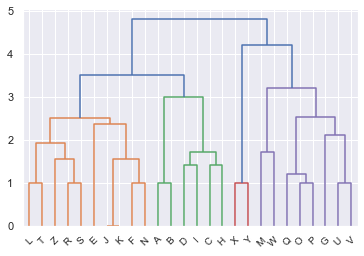

In [19]:
dend=dendrogram(link_method,labels = labelList)

# CUtting the Dendrogram with suitable cluster

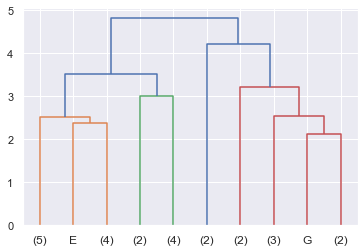

In [26]:
dend = dendrogram(link_method, p =10, truncate_mode='lastp',labels = labelList)

In [27]:
from scipy.cluster.hierarchy import fcluster

In [29]:
clusters = fcluster(link_method,3,criterion = 'maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 2, 2, 1], dtype=int32)

In [30]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [31]:
df['Clusters']= clusters
df.head(1)

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,Clusters
0,1,A,5,2,5,5,3,1


<AxesSubplot:>

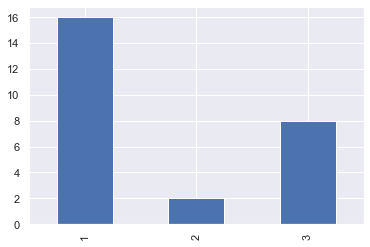

In [33]:
df['Clusters'].value_counts().sort_index().plot(kind='bar')

# Making CLuster Profiles


In [35]:
argdata  = df.iloc[:,1:8].groupby('Clusters').mean()
argdata['Freq'] = df.Clusters.value_counts().sort_index()
argdata

,Teaching,Fees,Placements,Internship,Infrastructure,Freq
Clusters,,,,,,
1,3.375,4.125,3.875,3.4375,3.875,16
2,1.000,1.000,1.000,1.5000,5.000,2
3,2.125,3.125,1.375,1.7500,2.000,8


# Recommendations

1. Clusters1 : Tier 1 colleges (Top Colleges) 
2. Cluster2 - Tier 3 colleges (poor perfroming colleges)
3. Cluster3 - Tier 2 colleges (not too good not to bad.)

# Using Agglomatrive CLustering

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
cluster = AgglomerativeClustering(n_clusters = 6,affinity='euclidean',linkage = 'average')
cluster_agro = cluster.fit_predict(egn.iloc[:,1:6])
print(cluster_agro)

[5 5 3 3 1 1 0 3 3 1 1 1 4 1 0 0 0 1 1 1 0 0 4 2 2 1]


In [41]:
df['Cluster_Agg'] = cluster_agro
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,Clusters,Cluster_Agg
0,1,A,5,2,5,5,3,1,5
1,2,B,4,2,5,5,3,1,5
2,3,C,4,5,5,4,5,1,3
3,4,D,5,4,5,4,4,1,3
4,5,E,2,5,2,2,5,1,1


In [42]:
df.columns

Index(['SR_NO', 'Engg_College', 'Teaching', 'Fees', 'Placements', 'Internship',
       'Infrastructure', 'Clusters', 'Cluster_Agg'],
      dtype='object')

In [45]:
aggl_data=df.drop(['SR_NO', 'Clusters'],axis=1).groupby("Cluster_Agg").mean()
aggl_data['Frequncey']=df.Cluster_Agg.value_counts().sort_index()
print(aggl_data)

             Teaching  Fees  Placements  Internship  Infrastructure  Frequncey
Cluster_Agg                                                                   
0            2.333333  2.50        1.50    1.833333        2.166667          6
1            2.800000  4.50        3.30    2.800000        3.800000         10
2            1.000000  1.00        1.00    1.500000        5.000000          2
3            4.250000  4.25        4.75    4.250000        4.500000          4
4            1.500000  5.00        1.00    1.500000        1.500000          2
5            4.500000  2.00        5.00    5.000000        3.000000          2


# Result 

1. Cluster 5 is the best - have best teaching, best placement and best internship.
2. Cluster 3 is 2nd best - have 2nd best teaching, placement and internship. But there fees is less and the infrastructure is much better. 

Done